**PROJECT ON INVOICE PAYMENT DELAY PREDICTION FOR ORACLE COMPANY**

#Using Mock Dataset



In [ ]:
#Dataset - /content/Invoice_payment_data.csv

In [ ]:
# IGNORE WARNINGS

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Importing and reading dataset

df = pd.read_csv('Invoice_payment_data.csv')
df.head()

,invoice_id,supplier_id,invoice_date,due_date,payment_date,invoice_amount,payment_amount,payment_status
0,1,1051,11-07-2023,10-08-2023,09-08-2023,1902.17,1902.17,On Time
1,2,1092,11-07-2023,10-08-2023,09-08-2023,2507.66,2507.66,On Time
2,3,1014,11-07-2023,10-08-2023,09-08-2023,2846.93,2846.93,Late
3,4,1071,11-07-2023,10-08-2023,09-08-2023,2923.62,2923.62,Late
4,5,1060,11-07-2023,10-08-2023,09-08-2023,2740.72,2740.72,Late


In [ ]:
#Checking the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      1000 non-null   int64  
 1   supplier_id     1000 non-null   int64  
 2   invoice_date    1000 non-null   object 
 3   due_date        1000 non-null   object 
 4   payment_date    1000 non-null   object 
 5   invoice_amount  1000 non-null   float64
 6   payment_amount  1000 non-null   float64
 7   payment_status  1000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [ ]:
#Summary statistics
df.describe()

,invoice_id,supplier_id,invoice_amount,payment_amount
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,500.500000,1049.128000,3011.16248,3011.16248
std,288.819436,29.573505,1168.98671,1168.98671
min,1.000000,1000.000000,1000.75000,1000.75000
25%,250.750000,1023.000000,1986.53000,1986.53000
50%,500.500000,1050.000000,3048.80500,3048.80500
75%,750.250000,1074.000000,4038.36000,4038.36000
max,1000.000000,1099.000000,4998.86000,4998.86000


In [ ]:
#Count of on time vs late payment
df['payment_status'].value_counts()

,count
payment_status,
Late,764
On Time,236


In [ ]:
#Creating target variable
df['is_late']=df['payment_status'].apply(lambda x:1 if x=='Late' else 0)

In [ ]:
#Checking for missing values
df.isnull().sum()

,0
invoice_id,0
supplier_id,0
invoice_date,0
due_date,0
payment_date,0
invoice_amount,0
payment_amount,0
payment_status,0
is_late,0


In [ ]:
#Number of days payment was delayed
df['payment_date'] = pd.to_datetime(df['payment_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

df['payment_delay_days'] = (df['payment_date'] - df['due_date']).dt.days

In [ ]:
#Days between invoice date and due date
df['due_date'] = pd.to_datetime(df['due_date'])
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

df['invoice_to_due_days'] = (df['due_date'] - df['invoice_date']).dt.days

In [ ]:
# Extract month and day of week from invoice date
df['invoice_month'] = df['invoice_date'].dt.month
df['invoice_dayofweek'] = df['invoice_date'].dt.dayofweek


In [ ]:
# Preview the new columns
df[['payment_delay_days', 'invoice_to_due_days', 'invoice_month', 'invoice_dayofweek']].head()

,payment_delay_days,invoice_to_due_days,invoice_month,invoice_dayofweek
0,-30,-30,11,1
1,-30,-30,11,1
2,-30,-30,11,1
3,-30,-30,11,1
4,-30,-30,11,1


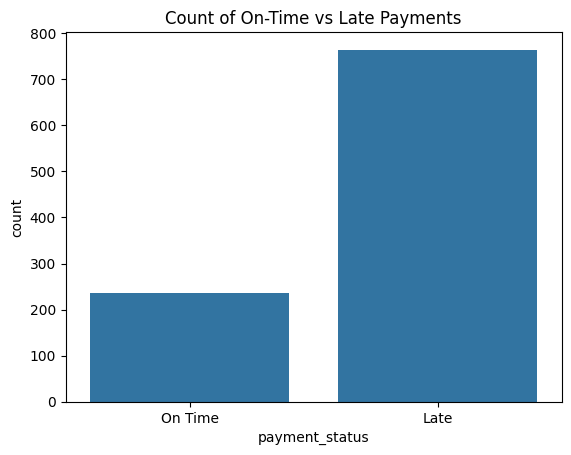

In [ ]:
#Count of on time and late payment
sns.countplot(data=df, x='payment_status')
plt.title('Count of On-Time vs Late Payments')
plt.show()

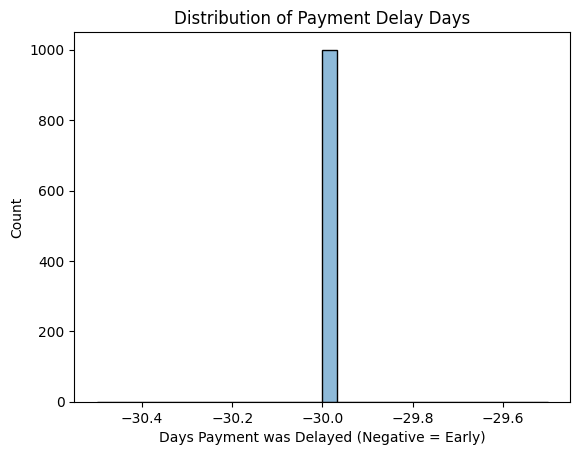

In [ ]:
#Distribution of payment delays
sns.histplot(df['payment_delay_days'], bins=30, kde=True)
plt.title('Distribution of Payment Delay Days')
plt.xlabel('Days Payment was Delayed (Negative = Early)')
plt.show()

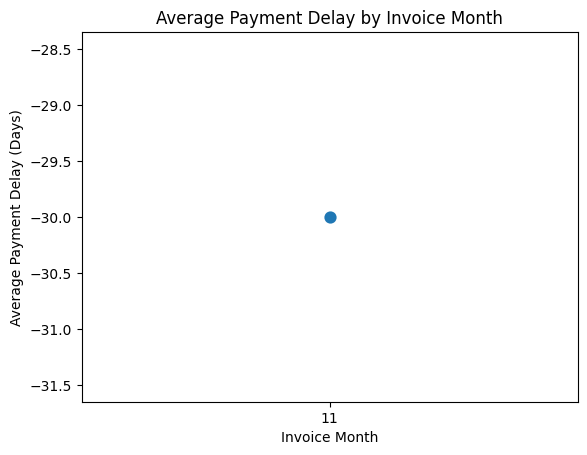

In [ ]:
#Average payment delayed by invoiced month

avg_delay_month = df.groupby('invoice_month')['payment_delay_days'].mean().reset_index()

sns.pointplot(data=avg_delay_month, x='invoice_month', y='payment_delay_days')
plt.title('Average Payment Delay by Invoice Month')
plt.xlabel('Invoice Month')
plt.ylabel('Average Payment Delay (Days)')
plt.show()

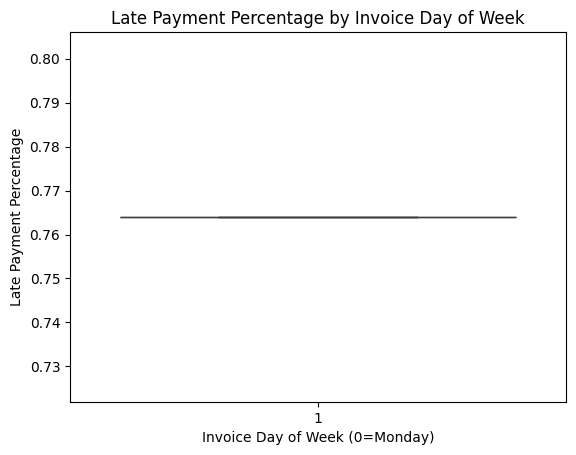

In [ ]:
#Late payment percentage

late_percentage = df.groupby('invoice_dayofweek')['is_late'].mean().reset_index()

sns.boxplot(data=late_percentage, x='invoice_dayofweek', y='is_late')
plt.title('Late Payment Percentage by Invoice Day of Week')
plt.xlabel('Invoice Day of Week (0=Monday)')
plt.ylabel('Late Payment Percentage')
plt.show()

# INVOICE PAYMENT DELAY PREDICTION (MACHINE LEARNING)

**TESTING ML MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# X= Input features and Y = Target
features = ['payment_delay_days', 'invoice_month', 'invoice_dayofweek', 'invoice_to_due_days']
x=df[features]
y=df['is_late']
df.head()

,invoice_id,supplier_id,invoice_date,due_date,payment_date,invoice_amount,payment_amount,payment_status,is_late,payment_delay_days,invoice_to_due_days,invoice_month,invoice_dayofweek
0,1,1051,2023-11-07,2023-10-08,2023-09-08,1902.17,1902.17,On Time,0,-30,-30,11,1
1,2,1092,2023-11-07,2023-10-08,2023-09-08,2507.66,2507.66,On Time,0,-30,-30,11,1
2,3,1014,2023-11-07,2023-10-08,2023-09-08,2846.93,2846.93,Late,1,-30,-30,11,1
3,4,1071,2023-11-07,2023-10-08,2023-09-08,2923.62,2923.62,Late,1,-30,-30,11,1
4,5,1060,2023-11-07,2023-10-08,2023-09-08,2740.72,2740.72,Late,1,-30,-30,11,1


In [ ]:
#Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (800, 4)
Test shape: (200, 4)


**TRAINING ML MODEL**

In [ ]:
#Creating and Training the model

model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predicting on test
y_pred=model.predict(x_test)

#Valuating
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[  0  42]
 [  0 158]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.79      1.00      0.88       158

    accuracy                           0.79       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.62      0.79      0.70       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
